## <span style="color:blue">행복에 영향을 미치는 변수와 국가별 행복지수 분석하기</span>


- #### 가장 기본적인 통계와 시각화를 통해 데이터 기반으로 설득해보자.
- #### EDA는 탐색적 데이터 분석 기법으로 주어진 데이터를 이해하는 과정이다.

### <span style="background-color:#fff5b1">1) 분석 목표</span>
- #### <span style="color:red">행복이 어떤 변수와 관련이 있는지 알아보기</span>
- #### <span style="color:red">전 세계 지역에 따라 행복지수가 어떻게 분포가 되어있는지 알아보기</span>

### 2) <span style="background-color:#fff5b1">데이터 수집</span>
- #### 세계행복보고서 데이터 수집(2015년-2022년)
- #### 보고서는 국가별 행복의 차이에 대해 설명하기 위해 여섯 가지 요소(경제적 생산, 사회적 지원, 기대수명, 자유, 부패 부재, 관대함)들의 지표를 제공

### <span style="background-color:#fff5b1">3) EDA 수행하기</span>
- #### a. 데이터 불러오기 
- #### b. 데이터 훑어보기 및 데이터 타입 확인
- #### c. 결측치 처리 
- #### d. 이상치 처리 
- #### e. 종속변수 분포 확인 
- #### f. 종속변수와 독립변수 관계 
- #### g. 상관관계 분석


In [13]:
# Git에서 파일 연동하기
!git clone https://github.com/sangsucki/DataDrivenReport.git

fatal: destination path 'DataDrivenReport' already exists and is not an empty directory.


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/Users/katenam/DataDrivenReport/happiness.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### <span style="background-color:#E6E6FA">변수 설명)</span>
- #### <span style="color:blueviolet">Score(종속변수):</span> 행복도 점수는 갤럽 세계 여론조사의 데이터를 사용한다. 점수는 설문조사에서 질문한 주요 삶의 평가 질문에 대한 답변을 기반으로 <br/><br/> 한다. 최고의 삶을 10, 최악의 삶을 0으로 표시함으로써 응답자에게 현재 자신의 삶을 평가하도록 요청한다. (2013년 - 2016년)
- #### <span style="color:blueviolet">Overall rank:</span> 행복도 점수 순위
- #### <span style="color:blueviolet">Country or region:</span> 국민의 평균 소득 수준
- #### <span style="color:blueviolet">GDP per capita:</span> 국민의 평균 소득 수준
- #### <span style="color:blueviolet">Family - Social support:</span> 가족, 사회적 지원(당신의 삶에 문제가 생겼을 때 무슨  일이든 도와줄 수 있는 가족이나 친구가 있는가)
- #### <span style="color:blueviolet">Life expectancy:</span> 기대수명(국민들이 건강한 상태로 얼마나 오래 살 수 있는가)
- #### <span style="color:blueviolet">Freedom:</span> 자유(삶에서 충분한 자유를 누릴 수 있는가)
- #### <span style="color:blueviolet">Generosity: </span>관대함(기부 문화: 지난 달에 기부를 한 적이 있는가)
- #### <span style="color:blueviolet">Trust government corruption:</span> 부패 부재(당신 국가의 정부 및 기업에 부패가 만연하다고 생각하는가)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [25]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [26]:
df.shape

(156, 9)

In [27]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


- #### std(표준편차)가 3 이상 차이 나면 이상치를 의심할 수 있지만, Overall rank는 순위 열이기에 제외하고 그 외에는 std가 높은 열은 없어보인다.

In [23]:
import plotly.graph_objs as go
from plotly.offline import iplot

map_happy = dict(type = 'choropleth',
           locations = df['Country or region'],
           locationmode = 'country names',
           z = df['Score'],
           text = df['Country or region'],
           colorbar = {'title':'Happiness score'})

layout = dict(title = 'Happiness Score across the World',
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [map_happy], layout=layout)
iplot(choromap3)

<AxesSubplot:>

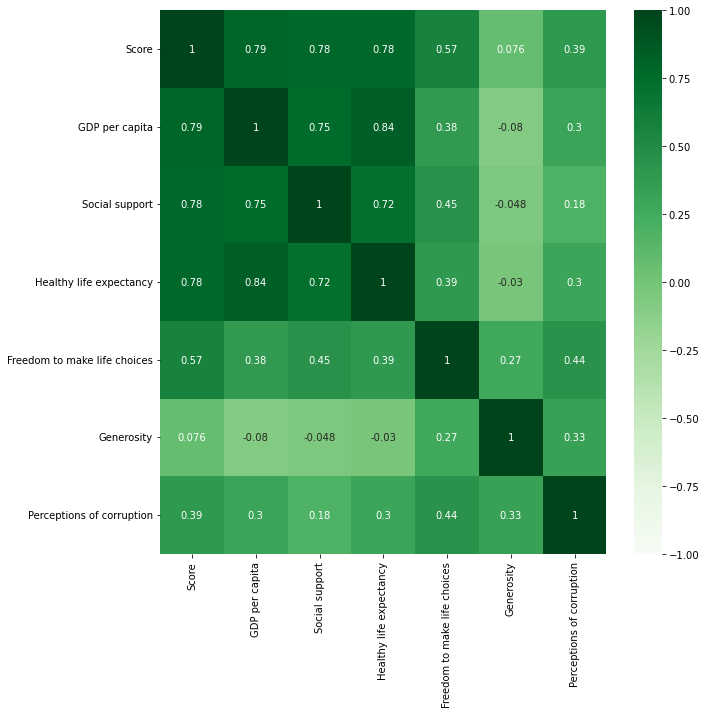

In [21]:
#heatmap으로 상관관계를 표시
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["figure.figsize"] = (10,10)
sb.heatmap(dff.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

#### 결과 해석)
- #### 행복에 가장 큰 영향을 미치는 요소는 1인당 GDP, 사회적 지원, 건강한 기대수명이며, 정책 인압자는 이러한 요소를 개선하는데 집중해야한다.


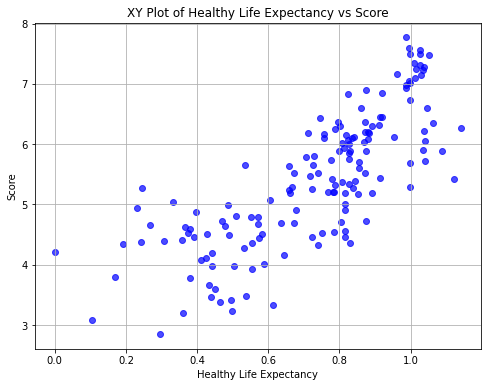

In [22]:
# Create an XY plot (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(df['Healthy life expectancy'], df['Score'], color='blue', alpha=0.7)
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Score')
plt.title('XY Plot of Healthy Life Expectancy vs Score')
plt.grid(True)
plt.show()

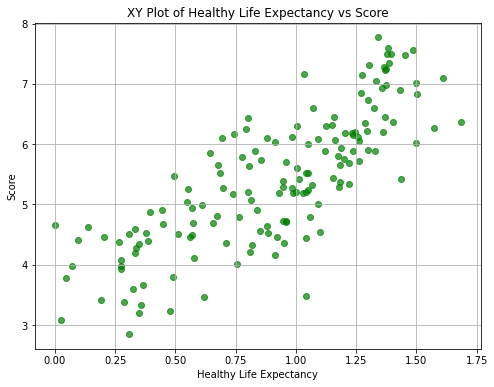

In [25]:
# Create an XY plot (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(df['GDP per capita'], df['Score'], color='green', alpha=0.7)
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Score')
plt.title('XY Plot of Healthy Life Expectancy vs Score')
plt.grid(True)
plt.show()